In [1]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import scipy.ndimage
from skimage import measure, morphology
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import h5py
import matplotlib.pyplot as plt

In [2]:
cd /Share/home/chenxupeng/projects/pr/preprocess/

/Share/home/chenxupeng/projects/pr/preprocess


In [28]:
f = h5py.File('processed_tensor_1')

In [31]:
sample = f['preprocessLKDS-00001'][:,:,:]

In [32]:
sample.shape

(281, 512, 512)

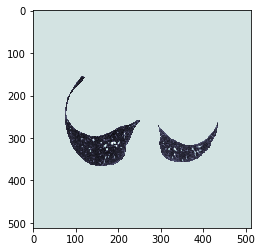

In [33]:
imshow(sample[200],cmap = cm.bone)

In [34]:
old_spacing = np.loadtxt('spacing/spacing_info_1.txt')

In [38]:
old_spacing[0]/[1,1,1]

array([ 0.806641,  0.806641,  1.25    ])

In [39]:
def resample(image, old_spacing, new_spacing=[1,1,1]):
    resize_factor = old_spacing / new_spacing
    new_real_shape = image.shape * resize_factor
    new_shape = np.round(new_real_shape)
    real_resize_factor = new_shape / image.shape
    new_spacing = old_spacing / real_resize_factor
    image = scipy.ndimage.interpolation.zoom(image, real_resize_factor, mode='nearest')
    return image, new_spacing

In [161]:
img, spa = resample(sample, old_spacing[0], new_spacing=[1,1,1])

In [162]:
img.shape

(227, 413, 640)

In [163]:
img = img.transpose(2,1,0)

In [164]:
img.shape

(640, 413, 227)

In [166]:
t = measure.marching_cubes(p, level = 400)

In [172]:
t[0][t[3].astype('int')]

IndexError: index 1132 is out of bounds for axis 0 with size 320

In [170]:
t[1].shape

(620, 3)

In [178]:
img.shape

(640, 413, 227)

In [3]:
f = h5py.File('processed_tensor/processed_tensor_1')
img = f['preprocessLKDS-00003'][:,:,:]

In [4]:
def plot_3d(image, threshold = -300):
    # Position the scan upright,
    # so the head of the patient would be at the top facing the camera
    p = image.transpose(2,1,0)
    verts, faces, _, _ = measure.marching_cubes(p, level = threshold)

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    # Fancy indexing: `verts[faces]` to generate a collection of triangles
    mesh = Poly3DCollection(verts[faces], alpha=0.1)
    face_color = [0.5, 0.5, 1]
    mesh.set_facecolor(face_color)
    ax.add_collection3d(mesh)
    ax.set_xlim(0, p.shape[0])
    ax.set_ylim(0, p.shape[1])
    ax.set_zlim(0, p.shape[2])
    plt.show()

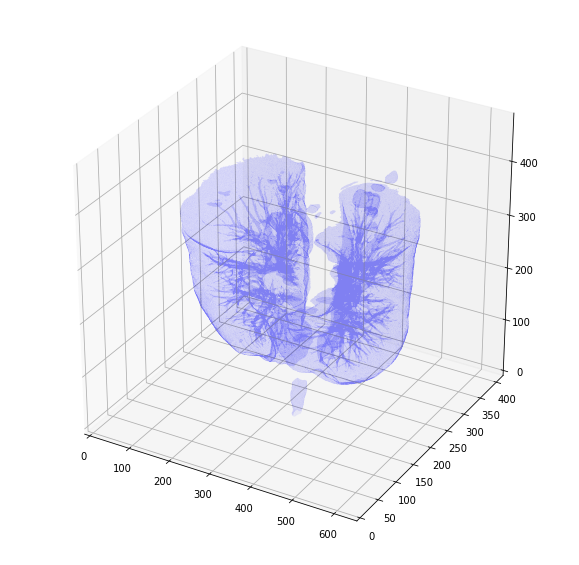

In [11]:
figure = plot_3d(img,-200)

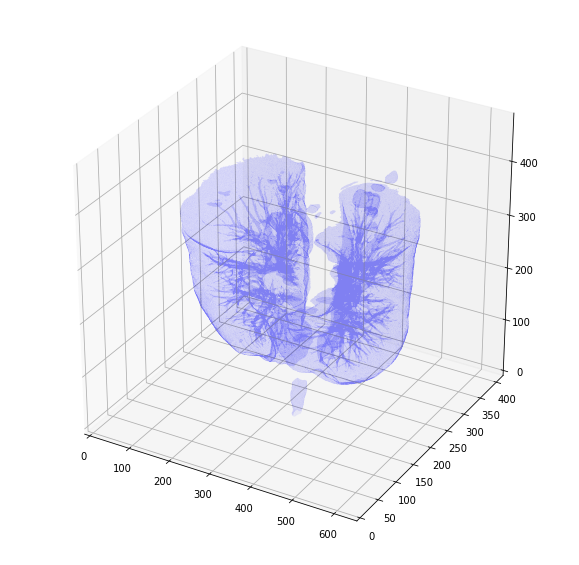

In [10]:
plot_3d(img,-200)

In [136]:
p = img.transpose(2,1,0)
t =measure.marching_cubes(p, level = 400)

In [137]:
t[0].shape

(320, 3)

In [145]:
t[1]

array([[  2,   1,   0],
       [  0,   3,   2],
       [  1,   4,   0],
       ..., 
       [316, 319, 315],
       [319, 317, 314],
       [317, 319, 316]], dtype=int32)

In [139]:
t[1].shape

(620, 3)

In [140]:
t[3].shape

(320,)

In [148]:
t[2].shape

(320, 3)

In [149]:
t[0].shape

(320, 3)

In [151]:
np.concatenate((t[0],t[1],t[2])).shape

(1260, 3)

In [38]:
cd 3D_image/

/Share/home/chenxupeng/projects/pr/preprocess/3D_image


In [34]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [35]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [44]:
a = mpimg.imread('LKDS-00042.png')

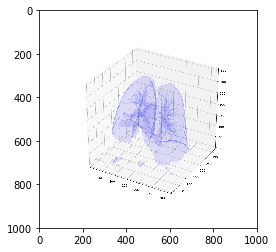

In [45]:
imshow(a)

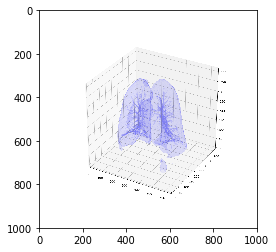

In [42]:
imshow(a)